=== HỆ THỐNG GỢI Ý LỘ TRÌNH HỌC TẬP VỚI Q-LEARNING ===
Đã load cấu trúc khóa học.
Đã đọc 867 log entries từ moodle_logs.csv
Đang tìm số cụm tối ưu...
Số cụm 2: Silhouette Score = 0.345
Số cụm 3: Silhouette Score = 0.302
Số cụm 4: Silhouette Score = 0.306
Số cụm tối ưu: 2 (Silhouette Score = 0.345)


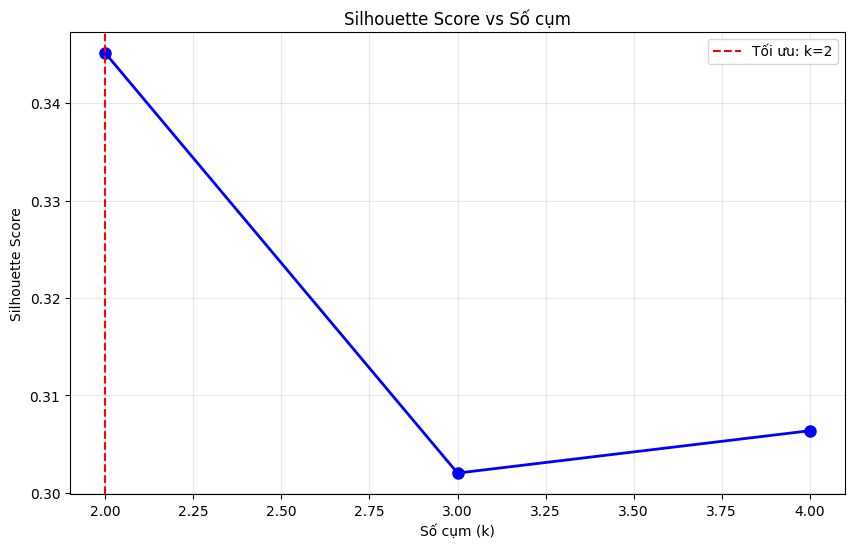

Đang tìm số cụm tối ưu...
Số cụm 2: Silhouette Score = 0.392
Số cụm 3: Silhouette Score = 0.323
Số cụm 4: Silhouette Score = 0.258
Số cụm tối ưu: 2 (Silhouette Score = 0.392)


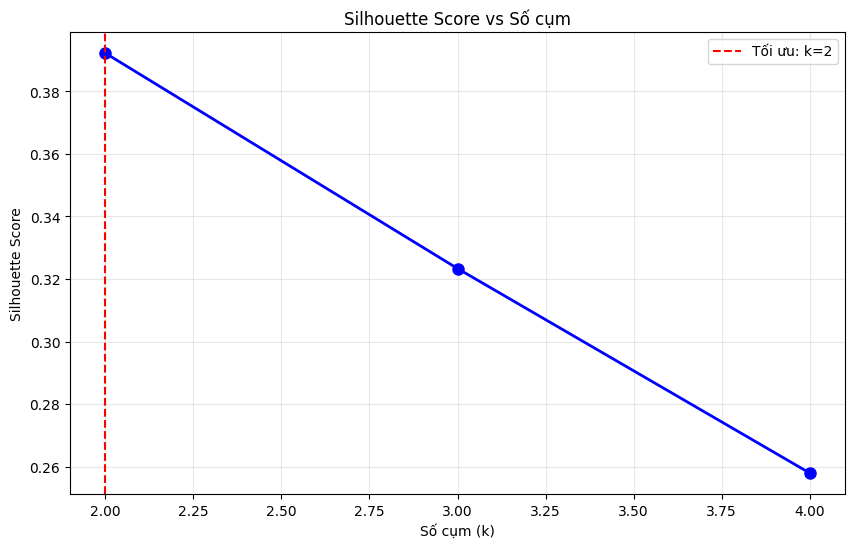

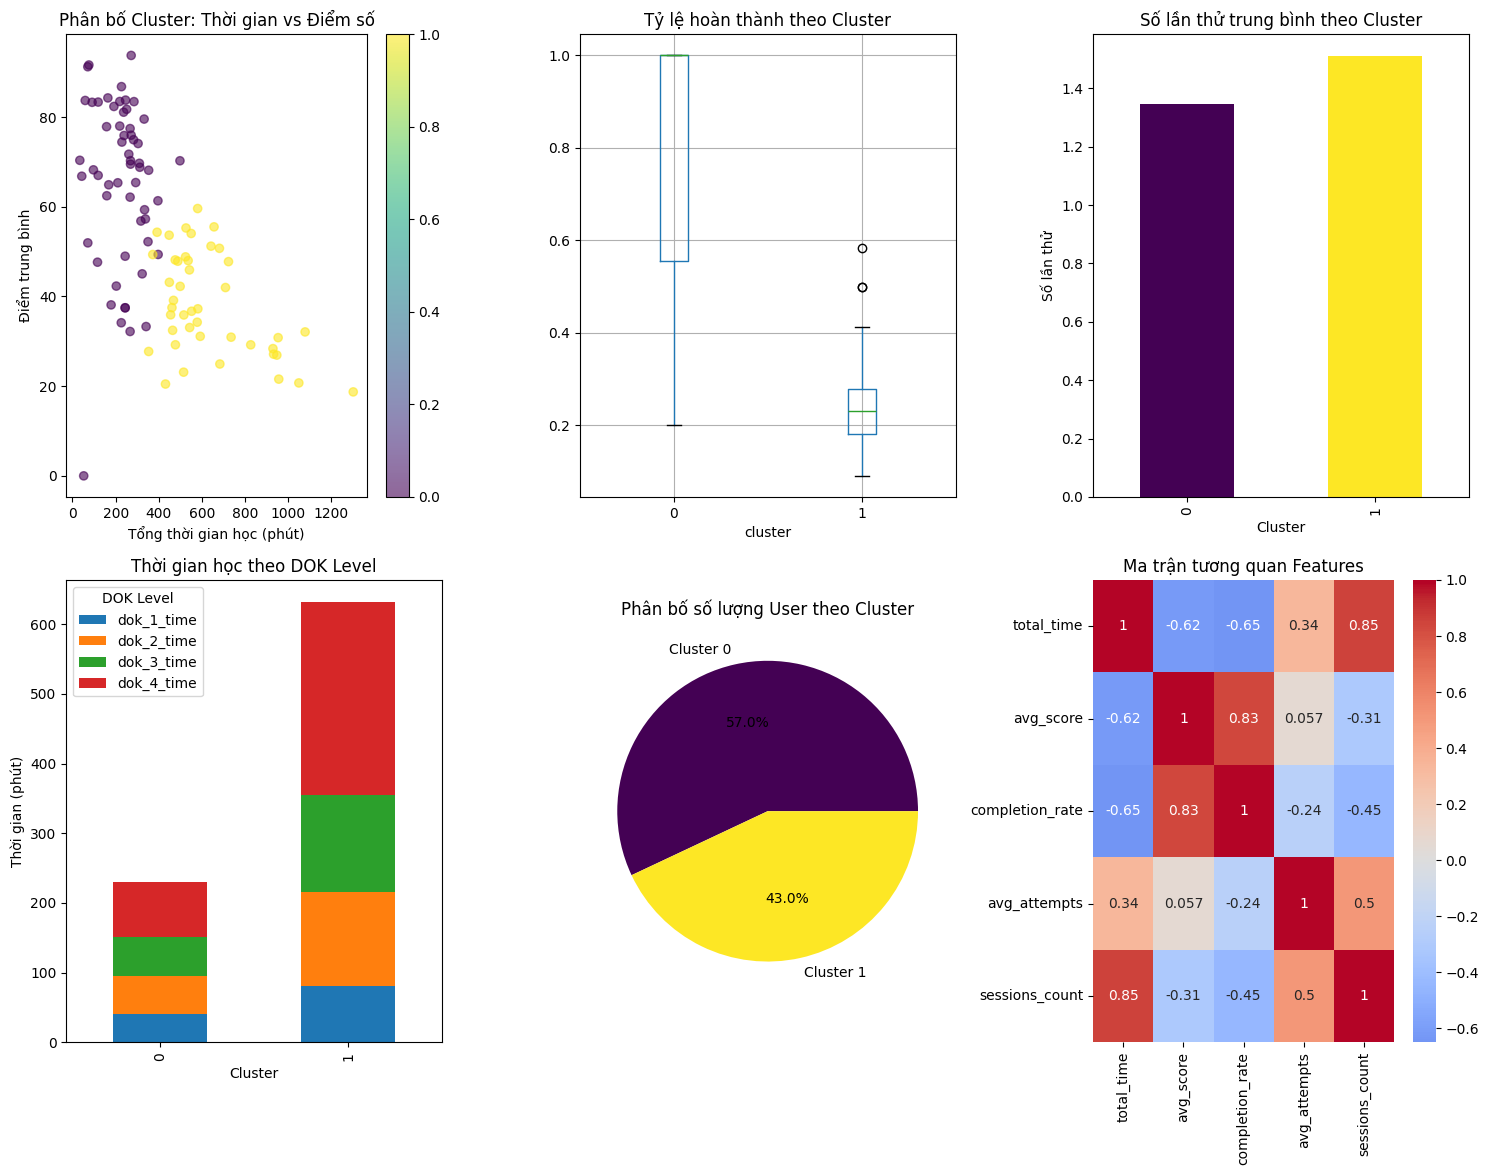

Đã lưu thông tin 100 users vào user_clusters.csv
Đã phân cụm người học.
Bắt đầu huấn luyện Q-learning...
Episode 0/500
Episode 100/500
Episode 200/500
Episode 300/500
Episode 400/500
Hoàn thành huấn luyện Q-learning!
Đã lưu Q-table với 6805 entries vào qtable.csv

Gợi ý lộ trình học tập cho user 32.0 (cluster 0.0):
Bước 1: [Next] Thiết kế chương trình xử lý ngoại lệ nâng cao (DOK 4, 30 phút)
Bước 2: [Next] Hiểu JFrame và JPanel (DOK 1, 15 phút)
Bước 3: [Next] Tạo giao diện đơn giản (DOK 2, 25 phút)
Bước 4: [Next] Phân tích layout managers (DOK 3, 20 phút)
Bước 5: [Next] Thiết kế giao diện phức tạp (DOK 4, 45 phút)


In [8]:
import numpy as np
import pandas as pd
import json
from datetime import datetime, timedelta
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, deque
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

class CourseStructureLoader:
    """Lớp để đọc cấu trúc khóa học từ file JSON"""
    
    def __init__(self, config_file='course_structure.json'):
        self.config_file = config_file
        self.course_structure = self.load_course_structure()
    
    def load_course_structure(self):
        """Đọc cấu trúc khóa học từ file JSON"""
        if os.path.exists(self.config_file):
            with open(self.config_file, 'r', encoding='utf-8') as f:
                return json.load(f)
        else:
            # Tạo file mẫu nếu chưa có
            default_structure = self.create_default_structure()
            self.save_course_structure(default_structure)
            return default_structure
    
    def create_default_structure(self):
        """Tạo cấu trúc khóa học mặc định"""
        return {
            "chapter_1": {
                "name": "Cơ sở lập trình Java Swing",
                "learning_units": {
                    "1.1": {
                        "name": "Giới thiệu và xử lý ngoại lệ",
                        "learning_objects": {
                            "1.1.1": {
                                "name": "Hiểu cú pháp Try...Catch",
                                "dok_level": 1,
                                "description": "Video hoặc tài liệu giải thích cú pháp cơ bản của Try...Catch",
                                "activity_type": "video",
                                "duration": 10,
                                "has_assessment": False
                            },
                            "1.1.2": {
                                "name": "Áp dụng Try...Catch trong chương trình đơn giản",
                                "dok_level": 2,
                                "description": "Tài liệu hướng dẫn áp dụng Try...Catch để xử lý lỗi nhập liệu",
                                "activity_type": "practice",
                                "duration": 15,
                                "has_assessment": True
                            },
                            "1.1.3": {
                                "name": "Phân tích lỗi với Try...Catch",
                                "dok_level": 3,
                                "description": "Quiz hoặc bài tập yêu cầu phân tích và xử lý nhiều lỗi phức tạp",
                                "activity_type": "quiz",
                                "duration": 20,
                                "has_assessment": True
                            },
                            "1.1.4": {
                                "name": "Thiết kế chương trình xử lý ngoại lệ nâng cao",
                                "dok_level": 4,
                                "description": "Bài tập yêu cầu thiết kế chương trình xử lý ngoại lệ độc đáo",
                                "activity_type": "project",
                                "duration": 30,
                                "has_assessment": True
                            }
                        }
                    },
                    "1.2": {
                        "name": "Giao diện người dùng cơ bản",
                        "learning_objects": {
                            "1.2.1": {
                                "name": "Hiểu JFrame và JPanel",
                                "dok_level": 1,
                                "description": "Tìm hiểu các thành phần cơ bản của Swing",
                                "activity_type": "video",
                                "duration": 15,
                                "has_assessment": False
                            },
                            "1.2.2": {
                                "name": "Tạo giao diện đơn giản",
                                "dok_level": 2,
                                "description": "Thực hành tạo form đơn giản",
                                "activity_type": "practice",
                                "duration": 25,
                                "has_assessment": True
                            },
                            "1.2.3": {
                                "name": "Phân tích layout managers",
                                "dok_level": 3,
                                "description": "So sánh và lựa chọn layout phù hợp",
                                "activity_type": "quiz",
                                "duration": 20,
                                "has_assessment": True
                            },
                            "1.2.4": {
                                "name": "Thiết kế giao diện phức tạp",
                                "dok_level": 4,
                                "description": "Tạo ứng dụng với giao diện chuyên nghiệp",
                                "activity_type": "project",
                                "duration": 45,
                                "has_assessment": True
                            }
                        }
                    }
                }
            }
        }
    
    def save_course_structure(self, structure):
        """Lưu cấu trúc khóa học vào file JSON"""
        with open(self.config_file, 'w', encoding='utf-8') as f:
            json.dump(structure, f, ensure_ascii=False, indent=2)
    
    def get_learning_objects(self):
        """Trích xuất danh sách learning objects"""
        objects = {}
        for chapter_id, chapter in self.course_structure.items():
            for unit_id, unit in chapter["learning_units"].items():
                for obj_id, obj in unit["learning_objects"].items():
                    full_id = f"{chapter_id}.{unit_id}.{obj_id}"
                    objects[full_id] = obj
        return objects

class MoodleLogGenerator:
    def __init__(self, course_loader):
        self.course_loader = course_loader
        self.learning_objects = course_loader.get_learning_objects()
        
    def generate_user_logs(self, num_users=100, days_range=30):
        """Sinh log tương tác của user với khóa học"""
        logs = []
        
        for user_id in range(1, num_users + 1):
            # Tạo profile user (khả năng học tập khác nhau)
            user_ability = random.uniform(0.3, 1.0)
            user_engagement = random.uniform(0.4, 1.0)
            
            # Sinh log cho mỗi user
            user_logs = self._generate_user_session(user_id, user_ability, user_engagement, days_range)
            logs.extend(user_logs)
            
        return pd.DataFrame(logs)
    
    def _generate_user_session(self, user_id, ability, engagement, days_range):
        """Sinh log session cho một user"""
        logs = []
        start_date = datetime.now() - timedelta(days=days_range)
        
        # Tạo sequence học tập theo thứ tự logic
        learning_sequence = list(self.learning_objects.keys())
        current_position = 0
        
        # Số session học tập của user
        num_sessions = int(random.uniform(5, 25) * engagement)
        
        for session in range(num_sessions):
            session_date = start_date + timedelta(days=random.randint(0, days_range))
            
            # Chọn learning object để học
            if current_position < len(learning_sequence):
                current_obj = learning_sequence[current_position]
                obj_info = self.learning_objects[current_obj]
                
                # Sinh log tương tác
                log_entry = self._create_log_entry(
                    user_id, session_date, current_obj, obj_info, ability, engagement
                )
                logs.append(log_entry)
                
                # Quyết định có tiến tới object tiếp theo không
                success_prob = min(0.9, ability + 0.1 * (4 - obj_info['dok_level']))
                if random.random() < success_prob:
                    current_position += 1
                    
        return logs
    
    def _create_log_entry(self, user_id, timestamp, object_id, obj_info, ability, engagement):
        """Tạo một log entry"""
        # Tính toán thời gian học và số lần thử
        base_time = obj_info['duration']
        time_spent = int(base_time * random.uniform(0.5, 2.0) / ability)
        
        # Tính điểm số nếu có assessment
        score = None
        attempts = 0
        
        if obj_info['has_assessment']:
            attempts = random.randint(1, 3)
            # Điểm số phụ thuộc vào ability và DOK level
            base_score = ability * 100
            difficulty_penalty = (obj_info['dok_level'] - 1) * 5
            score = max(0, min(100, base_score - difficulty_penalty + random.uniform(-10, 10)))
        
        return {
            'user_id': user_id,
            'timestamp': timestamp,
            'object_id': object_id,
            'dok_level': obj_info['dok_level'],
            'activity_type': obj_info['activity_type'],
            'time_spent': time_spent,
            'score': score,
            'attempts': attempts,
            'has_assessment': obj_info['has_assessment'],
            'completed': score is None or score >= 60
        }
    
    def save_logs_to_csv(self, logs_df, filename='moodle_logs.csv'):
        """Lưu logs vào file CSV"""
        logs_df.to_csv(filename, index=False, encoding='utf-8')
        print(f"Đã lưu {len(logs_df)} log entries vào {filename}")
    
    def load_logs_from_csv(self, filename='moodle_logs.csv'):
        """Đọc logs từ file CSV"""
        if os.path.exists(filename):
            df = pd.read_csv(filename, encoding='utf-8')
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            print(f"Đã đọc {len(df)} log entries từ {filename}")
            return df
        else:
            print(f"File {filename} không tồn tại")
            return None

class UserClusteringService:
    def __init__(self, max_clusters=10):
        self.max_clusters = max_clusters
        self.scaler = StandardScaler()
        self.kmeans = None
        self.variance_selector = VarianceThreshold(threshold=0.1)
        self.optimal_clusters = None
        
    def prepare_features(self, logs_df):
        """Chuẩn bị features cho clustering"""
        # Tính toán features cho mỗi user
        user_features = []
        
        for user_id in logs_df['user_id'].unique():
            user_logs = logs_df[logs_df['user_id'] == user_id]
            
            features = {
                'user_id': user_id,
                'total_time': user_logs['time_spent'].sum(),
                'avg_score': user_logs['score'].dropna().mean() if len(user_logs['score'].dropna()) > 0 else 0,
                'completion_rate': user_logs['completed'].mean(),
                'avg_attempts': user_logs['attempts'].mean(),
                'dok_1_time': user_logs[user_logs['dok_level'] == 1]['time_spent'].sum(),
                'dok_2_time': user_logs[user_logs['dok_level'] == 2]['time_spent'].sum(),
                'dok_3_time': user_logs[user_logs['dok_level'] == 3]['time_spent'].sum(),
                'dok_4_time': user_logs[user_logs['dok_level'] == 4]['time_spent'].sum(),
                'sessions_count': len(user_logs),
                'avg_session_length': user_logs['time_spent'].mean(),
                'video_time': user_logs[user_logs['activity_type'] == 'video']['time_spent'].sum(),
                'practice_time': user_logs[user_logs['activity_type'] == 'practice']['time_spent'].sum(),
                'quiz_time': user_logs[user_logs['activity_type'] == 'quiz']['time_spent'].sum(),
                'project_time': user_logs[user_logs['activity_type'] == 'project']['time_spent'].sum()
            }
            
            user_features.append(features)
        
        return pd.DataFrame(user_features)
    
    def find_optimal_clusters(self, user_features_df):
        """Tìm số cụm tối ưu sử dụng Silhouette Score"""
        print("Đang tìm số cụm tối ưu...")
        
        # Loại bỏ cột user_id để clustering
        feature_cols = user_features_df.columns.drop('user_id')
        X = user_features_df[feature_cols].fillna(0)
        
        # Chọn features có phương sai cao
        X_selected = self.variance_selector.fit_transform(X)
        
        # Chuẩn hóa dữ liệu
        X_scaled = self.scaler.fit_transform(X_selected)
        
        # Tính Silhouette Score cho các số cụm khác nhau
        silhouette_scores = []
        k_range = range(2, min(self.max_clusters + 1, len(user_features_df)))
        
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(X_scaled)
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            silhouette_scores.append(silhouette_avg)
            print(f"Số cụm {k}: Silhouette Score = {silhouette_avg:.3f}")
        
        # Tìm số cụm tối ưu
        optimal_k = k_range[np.argmax(silhouette_scores)]
        max_silhouette = max(silhouette_scores)
        
        print(f"Số cụm tối ưu: {optimal_k} (Silhouette Score = {max_silhouette:.3f})")
        
        self.optimal_clusters = optimal_k
        
        # Vẽ biểu đồ Silhouette Score
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
        plt.xlabel('Số cụm (k)')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Score vs Số cụm')
        plt.grid(True, alpha=0.3)
        plt.axvline(x=optimal_k, color='red', linestyle='--', 
                   label=f'Tối ưu: k={optimal_k}')
        plt.legend()
        plt.savefig('silhouette_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return optimal_k, max_silhouette
    
    def cluster_users(self, user_features_df):
        """Phân cụm users với số cụm tối ưu"""
        # Tìm số cụm tối ưu
        optimal_k, _ = self.find_optimal_clusters(user_features_df)
        
        # Loại bỏ cột user_id để clustering
        feature_cols = user_features_df.columns.drop('user_id')
        X = user_features_df[feature_cols].fillna(0)
        
        # Chọn features có phương sai cao
        X_selected = self.variance_selector.fit_transform(X)
        
        # Chuẩn hóa dữ liệu
        X_scaled = self.scaler.fit_transform(X_selected)
        
        # Phân cụm với số cụm tối ưu
        self.kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        clusters = self.kmeans.fit_predict(X_scaled)
        
        # Thêm cluster labels vào DataFrame
        user_features_df['cluster'] = clusters
        
        return user_features_df
    
    def get_cluster_characteristics(self, user_features_df):
        """Phân tích đặc điểm của từng cluster"""
        cluster_stats = user_features_df.groupby('cluster').agg({
            'total_time': ['mean', 'std'],
            'avg_score': ['mean', 'std'],
            'completion_rate': ['mean', 'std'],
            'avg_attempts': ['mean', 'std'],
            'sessions_count': ['mean', 'std']
        }).round(2)
        
        return cluster_stats
    
    def visualize_clusters(self, user_features_df):
        """Vẽ biểu đồ trực quan các cluster"""
        n_clusters = len(user_features_df['cluster'].unique())
        
        plt.figure(figsize=(15, 12))
        
        # Subplot 1: Scatter plot của total_time vs avg_score
        plt.subplot(2, 3, 1)
        scatter = plt.scatter(user_features_df['total_time'], 
                            user_features_df['avg_score'], 
                            c=user_features_df['cluster'], 
                            cmap='viridis', alpha=0.6)
        plt.xlabel('Tổng thời gian học (phút)')
        plt.ylabel('Điểm trung bình')
        plt.title('Phân bố Cluster: Thời gian vs Điểm số')
        plt.colorbar(scatter)
        
        # Subplot 2: Box plot của completion_rate theo cluster
        plt.subplot(2, 3, 2)
        user_features_df.boxplot(column='completion_rate', by='cluster', ax=plt.gca())
        plt.title('Tỷ lệ hoàn thành theo Cluster')
        plt.suptitle('')
        
        # Subplot 3: Bar chart của avg_attempts theo cluster
        plt.subplot(2, 3, 3)
        cluster_attempts = user_features_df.groupby('cluster')['avg_attempts'].mean()
        colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
        cluster_attempts.plot(kind='bar', color=colors[:len(cluster_attempts)])
        plt.title('Số lần thử trung bình theo Cluster')
        plt.ylabel('Số lần thử')
        plt.xlabel('Cluster')
        
        # Subplot 4: Stacked bar chart của thời gian theo DOK level
        plt.subplot(2, 3, 4)
        dok_cols = ['dok_1_time', 'dok_2_time', 'dok_3_time', 'dok_4_time']
        dok_data = user_features_df.groupby('cluster')[dok_cols].mean()
        dok_data.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Thời gian học theo DOK Level')
        plt.ylabel('Thời gian (phút)')
        plt.xlabel('Cluster')
        plt.legend(title='DOK Level')
        
        # Subplot 5: Pie chart cho distribution của clusters
        plt.subplot(2, 3, 5)
        cluster_counts = user_features_df['cluster'].value_counts()
        plt.pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index], 
                autopct='%1.1f%%', colors=colors[:len(cluster_counts)])
        plt.title('Phân bố số lượng User theo Cluster')
        
        # Subplot 6: Heatmap correlation
        plt.subplot(2, 3, 6)
        correlation_cols = ['total_time', 'avg_score', 'completion_rate', 'avg_attempts', 'sessions_count']
        corr_matrix = user_features_df[correlation_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Ma trận tương quan Features')
        
        plt.tight_layout()
        plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_clusters_to_csv(self, user_features_df, filename='user_clusters.csv'):
        """Lưu kết quả phân cụm vào CSV"""
        user_features_df.to_csv(filename, index=False, encoding='utf-8')
        print(f"Đã lưu thông tin {len(user_features_df)} users vào {filename}")

class QLearningRecommendationSystem:
    def __init__(self, course_loader, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.course_loader = course_loader
        self.learning_objects = course_loader.get_learning_objects()
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        
        # Actions
        self.actions = ['Stay', 'Next', 'Previous', 'Go_to_high_level', 'Go_to_low_level']
        
        # Q-table
        self.q_table = {}
        
        # Theo dõi tiến độ học tập
        self.user_progress = {}
        
    def _get_q_value(self, state, action):
        """Lấy Q-value cho state-action pair"""
        if state not in self.q_table:
            self.q_table[state] = {}
        if action not in self.q_table[state]:
            self.q_table[state][action] = 0.0
        return self.q_table[state][action]
    
    def _set_q_value(self, state, action, value):
        """Đặt Q-value cho state-action pair"""
        if state not in self.q_table:
            self.q_table[state] = {}
        self.q_table[state][action] = value
    
    def create_state(self, user_id, cluster, current_object, score, attempts, time_spent):
        """Tạo state cho Q-learning"""
        obj_info = self.learning_objects.get(current_object, {})
        
        # Normalize score và time
        normalized_score = score / 100.0 if score is not None else 0.0
        normalized_time = min(time_spent / 60.0, 1.0)
        
        # Tính tiến độ hoàn thành khóa học
        completion_progress = self._calculate_completion_progress(user_id, current_object)
        
        state = {
            'cluster': cluster,
            'dok_level': obj_info.get('dok_level', 1),
            'has_assessment': obj_info.get('has_assessment', False),
            'score_normalized': normalized_score,
            'attempts': min(attempts, 5),
            'time_normalized': normalized_time,
            'object_position': self._get_object_position(current_object),
            'completion_progress': completion_progress
        }
        
        return self._state_to_string(state)
    
    def _calculate_completion_progress(self, user_id, current_object):
        """Tính tỷ lệ hoàn thành khóa học"""
        if user_id not in self.user_progress:
            self.user_progress[user_id] = set()
        
        self.user_progress[user_id].add(current_object)
        total_objects = len(self.learning_objects)
        completed_objects = len(self.user_progress[user_id])
        
        return min(completed_objects / total_objects, 1.0)
    
    def _state_to_string(self, state):
        """Chuyển state dict thành string để làm key"""
        return f"{state['cluster']}_{state['dok_level']}_{state['has_assessment']}_" \
               f"{state['score_normalized']:.2f}_{state['attempts']}_{state['time_normalized']:.2f}_" \
               f"{state['object_position']}_{state['completion_progress']:.2f}"
    
    def _get_object_position(self, object_id):
        """Lấy vị trí của object trong sequence"""
        objects_list = list(self.learning_objects.keys())
        try:
            return objects_list.index(object_id)
        except ValueError:
            return 0
    
    def get_reward(self, old_state, action, new_state, user_id):
        """Tính reward cho action với focus vào hoàn thành khóa học"""
        reward = 0
        
        # Parse states
        old_parts = old_state.split('_')
        new_parts = new_state.split('_')
        
        old_score = float(old_parts[3])
        new_score = float(new_parts[3])
        
        old_dok = int(old_parts[1])
        new_dok = int(new_parts[1])
        
        old_pos = int(old_parts[6])
        new_pos = int(new_parts[6])
        
        old_progress = float(old_parts[7])
        new_progress = float(new_parts[7])
        
        # REWARD CHÍNH: Tiến độ hoàn thành khóa học
        if new_progress > old_progress:
            reward += 20  # Reward cao cho việc tiến bộ trong khóa học
        
        # REWARD PHỤ: Cải thiện điểm số
        if new_score > old_score:
            reward += (new_score - old_score) * 5
        
        # REWARD CHO SEQUENCE LEARNING
        if action == 'Next' and new_pos > old_pos:
            reward += 10  # Khuyến khích học theo sequence
        elif action == 'Previous' and new_pos < old_pos and new_score < 0.6:
            reward += 5   # Cho phép quay lại nếu điểm thấp
        
        # REWARD CHO ADAPTIVE LEARNING
        if action == 'Go_to_high_level' and new_dok > old_dok and old_score > 0.8:
            reward += 8   # Tăng độ khó khi làm tốt
        elif action == 'Go_to_low_level' and new_dok < old_dok and old_score < 0.6:
            reward += 6   # Giảm độ khó khi gặp khó khăn
        
        # PENALTY CHO HÀNH VI KHÔNG HIỆU QUẢ
        if action == 'Stay' and new_score <= old_score:
            reward -= 3
        
        # PENALTY CHO VIỆC LÙNG QUAY LẠI KHÔNG CẦN THIẾT
        if new_pos < old_pos and old_score > 0.7:
            reward -= 5
        
        # BONUS CHO VIỆC HOÀN THÀNH KHÓA HỌC
        if new_progress >= 0.95:  # Gần hoàn thành
            reward += 50
        
        return reward
    
    def choose_action(self, state, user_id=None):
        """Chọn action với bias hướng hoàn thành khóa học, vẫn tận dụng Q-table."""
        # Parse state để lấy thông tin
        state_parts = state.split('_')
        completion_progress = float(state_parts[7])
        current_position = int(state_parts[6])
        total_objects = len(self.learning_objects)
        
        # Danh sách tất cả các action có thể
        all_actions = ['Next', 'Previous', 'Stay', 'Go_to_high_level', 'Go_to_low_level']
        
        # Khởi tạo Q-table cho state nếu chưa tồn tại
        if state not in self.q_table:
            self.q_table[state] = {action: 0.0 for action in all_actions}
        
        q_values = self.q_table[state]
        
        # Epsilon-greedy
        if random.random() < self.epsilon:
            # Bias trong exploration dựa trên tiến độ
            if completion_progress < 0.3:
                # Giai đoạn đầu: ưu tiên Next và Go_to_high_level
                weights = {'Next': 0.4, 'Go_to_high_level': 0.3, 'Stay': 0.15, 'Previous': 0.1, 'Go_to_low_level': 0.05}
            elif completion_progress < 0.7:
                # Giai đoạn giữa: cân bằng hơn
                weights = {'Next': 0.3, 'Go_to_high_level': 0.2, 'Go_to_low_level': 0.2, 'Stay': 0.2, 'Previous': 0.1}
            else:
                # Giai đoạn cuối: ưu tiên mạnh Next để hoàn thành
                weights = {'Next': 0.6, 'Stay': 0.3, 'Previous': 0.05, 'Go_to_high_level': 0.025, 'Go_to_low_level': 0.025}
            
            # Chọn action ngẫu nhiên dựa trên trọng số
            actions = list(weights.keys())
            probabilities = list(weights.values())
            return random.choices(actions, weights=probabilities, k=1)[0]
        
        # Greedy: chọn action tốt nhất từ Q-table
        best_action = max(q_values, key=q_values.get)
        
        # Kiểm tra tính hợp lệ của action
        if best_action == 'Next' and current_position >= total_objects - 1:
            return 'Stay'
        elif best_action == 'Previous' and current_position <= 0:
            return 'Next'
        
        return best_action
    
    def update_q_table(self, state, action, reward, next_state):
        """Cập nhật Q-table"""
        current_q = self._get_q_value(state, action)

        # Tính max Q-value của next state
        max_next_q = 0
        if next_state in self.q_table and self.q_table[next_state]:
            max_next_q = max(self.q_table[next_state].values())

        # Q-learning update rule
        new_q = current_q + self.learning_rate * (
            reward + self.discount_factor * max_next_q - current_q
        )
        self._set_q_value(state, action, new_q)
        
    def train(self, logs_df, user_clusters_df, episodes=1000):
        """Huấn luyện Q-learning model"""
        print("Bắt đầu huấn luyện Q-learning...")
        
        # Merge logs với cluster information
        logs_with_clusters = logs_df.merge(
            user_clusters_df[['user_id', 'cluster']], 
            on='user_id'
        )
        
        for episode in range(episodes):
            if episode % 100 == 0:
                print(f"Episode {episode}/{episodes}")
            
            # Chọn random user session
            user_id = random.choice(logs_with_clusters['user_id'].unique())
            user_logs = logs_with_clusters[logs_with_clusters['user_id'] == user_id].sort_values('timestamp')
            
            if len(user_logs) < 2:
                continue
            
            # Simulate learning trajectory
            for i in range(len(user_logs) - 1):
                current_log = user_logs.iloc[i]
                next_log = user_logs.iloc[i + 1]
                
                # Tạo states
                current_state = self.create_state(
                    user_id, current_log['cluster'], current_log['object_id'],
                    current_log['score'], current_log['attempts'], current_log['time_spent']
                )
                
                next_state = self.create_state(
                    user_id, next_log['cluster'], next_log['object_id'],
                    next_log['score'], next_log['attempts'], next_log['time_spent']
                )
                
                # Chọn action
                action = self.choose_action(current_state)
                
                # Tính reward
                reward = self.get_reward(current_state, action, next_state, user_logs)
                
                # Cập nhật Q-table
                self.update_q_table(current_state, action, reward, next_state)
        
        print("Hoàn thành huấn luyện Q-learning!")

    def fit_score_predictor(self, logs_df):
        """Huấn luyện mô hình Linear Regression dự đoán score"""
        df = logs_df.dropna(subset=['score'])
        X = df[['dok_level', 'time_spent', 'attempts']]
        y = df['score']
        self.score_model = LinearRegression().fit(X, y)

    def predict_score(self, dok_level, time_spent, attempts):
        """Dự đoán score cho bước tiếp theo"""
        if hasattr(self, 'score_model'):
            X = np.array([[dok_level, time_spent, attempts]])
            return float(self.score_model.predict(X)[0])
        return 60.0

    def recommend_learning_path(self, user_id, cluster, current_object, score, attempts, time_spent, path_length=5):
        """Gợi ý lộ trình học tập hợp lý, ưu tiên hoàn thành khóa học"""
        recommendations = []
        current_score = score if score is not None else 60.0
        current_attempts = attempts if attempts is not None else 1
        current_time = time_spent if time_spent is not None else 10

        # Reset tiến độ cho user này
        self.user_progress[user_id] = set([current_object])

        objects_list = list(self.learning_objects.keys())
        for step in range(path_length):
            current_state = self.create_state(user_id, cluster, current_object, current_score, current_attempts, current_time)
            best_action = self.choose_action(current_state, user_id)
            next_object = self._get_next_object(current_object, best_action, objects_list)
            if next_object:
                obj_info = self.learning_objects[next_object]
                # Dự đoán score mới cho bước tiếp theo
                next_score = self.predict_score(obj_info['dok_level'], obj_info['duration'], current_attempts)
                recommendation = {
                    'step': step + 1,
                    'action': best_action,
                    'object_id': next_object,
                    'object_name': obj_info['name'],
                    'dok_level': obj_info['dok_level'],
                    'estimated_time': obj_info['duration'],
                    'has_assessment': obj_info['has_assessment'],
                    'predicted_score': round(next_score, 1)
                }
                recommendations.append(recommendation)
                # Cập nhật cho bước tiếp theo
                current_object = next_object
                current_score = next_score
                current_time = obj_info['duration']
                if obj_info['has_assessment']:
                    current_attempts = min(current_attempts + 1, 5)
                # Cập nhật tiến độ
                self.user_progress[user_id].add(current_object)
        return recommendations
    def _get_next_object(self, current_object, action, objects_list):
        """Xác định object tiếp theo dựa trên action"""
        current_position = self._get_object_position(current_object)
        
        if action == 'Stay':
            return current_object
        elif action == 'Next':
            if current_position < len(objects_list) - 1:
                return objects_list[current_position + 1]
        elif action == 'Previous':
            if current_position > 0:
                return objects_list[current_position - 1]
        elif action == 'Go_to_high_level':
            # Tìm object có DOK level cao hơn
            current_dok = self.learning_objects[current_object]['dok_level']
            for obj in objects_list[current_position:]:
                if self.learning_objects[obj]['dok_level'] > current_dok:
                    return obj
        elif action == 'Go_to_low_level':
            # Tìm object có DOK level thấp hơn
            current_dok = self.learning_objects[current_object]['dok_level']
            for obj in reversed(objects_list[:current_position]):
                if self.learning_objects[obj]['dok_level'] < current_dok:
                    return obj
        
        return current_object
    
    def save_qtable_to_csv(self, filename='qtable.csv'):
        """Lưu Q-table vào file CSV"""
        qtable_data = []
        for state, actions in self.q_table.items():
            for action, q_value in actions.items():
                qtable_data.append({
                    'state': state,
                    'action': action,
                    'q_value': q_value
                })
        
        df = pd.DataFrame(qtable_data)
        df.to_csv(filename, index=False, encoding='utf-8')
        print(f"Đã lưu Q-table với {len(qtable_data)} entries vào {filename}")
    
    def load_qtable_from_csv(self, filename='qtable.csv'):
        """Đọc Q-table từ file CSV"""
        if os.path.exists(filename):
            df = pd.read_csv(filename, encoding='utf-8')
            self.q_table = {}
            
            for _, row in df.iterrows():
                state = row['state']
                action = row['action']
                q_value = row['q_value']
                
                if state not in self.q_table:
                    self.q_table[state] = {}
                self.q_table[state][action] = q_value
            
            print(f"Đã đọc Q-table với {len(df)} entries từ {filename}")
        else:
            print(f"File {filename} không tồn tại")

# ...existing code...
def main():
    print("=== HỆ THỐNG GỢI Ý LỘ TRÌNH HỌC TẬP VỚI Q-LEARNING ===")
    # 1. Load cấu trúc khóa học
    course_loader = CourseStructureLoader()
    print("Đã load cấu trúc khóa học.")

    # 2. Sinh hoặc load logs
    log_gen = MoodleLogGenerator(course_loader)
    if os.path.exists('moodle_logs.csv'):
        logs_df = log_gen.load_logs_from_csv('moodle_logs.csv')
    else:
        logs_df = log_gen.generate_user_logs(num_users=100, days_range=30)
        log_gen.save_logs_to_csv(logs_df, 'moodle_logs.csv')

    # 3. Phân cụm người học
    cluster_service = UserClusteringService(max_clusters=4)  # Sửa n_clusters thành max_clusters
    user_features_df = cluster_service.prepare_features(logs_df)
    user_clusters_df = cluster_service.cluster_users(user_features_df)
    cluster_service.find_optimal_clusters(user_features_df=user_features_df)
    cluster_service.get_cluster_characteristics(user_features_df)
    cluster_service.visualize_clusters(user_clusters_df)
    cluster_service.save_clusters_to_csv(user_clusters_df, 'user_clusters.csv')
    print("Đã phân cụm người học.")

    # 4. Huấn luyện Q-learning
    ql_system = QLearningRecommendationSystem(course_loader)
    ql_system.train(logs_df, user_clusters_df, episodes=500)
    ql_system.save_qtable_to_csv('qtable.csv')
    ql_system.fit_score_predictor(logs_df)

    # 5. Gợi ý lộ trình học tập cho một user mẫu
    sample_user = user_clusters_df.sample(1).iloc[0]
    user_id = sample_user['user_id']
    cluster = sample_user['cluster']
    # Lấy object đầu tiên user đã học
    user_logs = logs_df[logs_df['user_id'] == user_id].sort_values('timestamp')
    if not user_logs.empty:
        first_log = user_logs.iloc[0]
        current_object = first_log['object_id']
        score = first_log['score']
        attempts = first_log['attempts']
        time_spent = first_log['time_spent']
        recommendations = ql_system.recommend_learning_path(
            user_id, cluster, current_object, score, attempts, time_spent, path_length=5
        )
        print(f"\nGợi ý lộ trình học tập cho user {user_id} (cluster {cluster}):")
        for rec in recommendations:
            print(f"Bước {rec['step']}: [{rec['action']}] {rec['object_name']} (DOK {rec['dok_level']}, {rec['estimated_time']} phút)")
    else:
        print("Không tìm thấy log cho user mẫu.")

if __name__ == "__main__":
    main()